# Review of electronics
Let's start with passive devices first.

Most of the signals of interest for us as AC (ie time dependent). 

The instantaneous power of an electrical signal is $P(t) = V(t) I(t)$.  The average power becomes:
\begin{align*}
<P> & = \frac{1}{T} \int_0^T V(t') I(t') dt' \\
\end{align*}

Energy stored in an electrical component:
\begin{align*}
E = \int_{0}^t V(t') I(t') dt'
\end{align*}



### Resistor
\begin{align*}
V = RI
\end{align*}
_Averaged power dissipated by a resistor_ 
\begin{align*}
<P> & = \frac{1}{T} \int_0^t V(t') I(t') dt' \\
    & = \frac{V_{RMS}^2}{R} \\
    & = R I_{RMS}^2
\end{align*}

__RMS defintion__
\begin{align*}
V_{RMS} & = \sqrt{\frac{1}{T} \int_0^t V(t')^2 dt'}\\
\end{align*}

We now know from Fourier analysis, that a well behaved signal can be decomposed as a some of sinusoidal waves.  It is therefore convenient to introduce a new definition of the amplitude of a signal that is not related to the actual amplitude of the signal, but to the average power carried by the harmonic, the RMS amplitude.

RMS of a sinusoid $V(t) = V_0 \cos (\omega t + \phi )$:
\begin{align*}
V_{RMS}^2 & = \frac{1}{T} \int_0^t \left(V_0 \cos (\omega t' + \phi) \right)^2 dt'\\
& = V_0^2 \frac{1}{2\pi} \int_0^{2\pi} \cos^2(x) dx\\
& = \frac{V_0^2}{2} \\
V_{RMS} & = \frac{V_0}{\sqrt{2}}
\end{align*}

$V_0$ is the amplitude of the sinusoidal signal, $V_{RMS}$ is the equivalent amplitude to the average power of the signal, $V_{pp} = 2 V_0$ is the peak to peak amplitude.

### Capacitor
<img src="img/Capacitor.png" width="240">
\begin{align*}
I = C \frac{dV}{dt}
\end{align*}
_Energy stored in a capacitor_ $E = 1/2 CV^2$


### Inductor
<img src="img/Inductor.png" width="240">
\begin{align*}
V = L \frac{dI}{dt}
\end{align*}
_Energy stored in an inductor_ $E = 1/2 LI^2$

### Impedance
\begin{align*}
V = Z I
\end{align*}
> resistor: 
\begin{align*}
Z=R
\end{align*}

> capacitor:
\begin{align*}
Z=\frac{1}{i\omega C}
\end{align*}

> inductor:
\begin{align*}
Z=i \omega L
\end{align*}
    

### Examples of circuits
    
__Optimal load__
    

__RC Circuit__

<img src="img/LPRCFilter.png" width="240">

\begin{align*}
V_{out} & = \left( \frac{1/(i \omega C)}{R + 1/(i \omega C)} \right) V_{in} \\
 & = \left( \frac{1}{1 + i \omega RC} \right) V_{in}
\end{align*}
The cutoff frequency is:
\begin{align*}
\omega_{cutoff} & = \frac{1}{RC}\\
f_{cutoff} = & \frac{\omega_{cutoff}}{2 \pi} = \frac{1}{2\pi RC}
\end{align*}


A 1$^{\mathrm{st}}$ order system has the equation:
\begin{align*}
a_1 \frac{dy}{dt} + a_0 y & = F(t) \\
\tau \frac{dy}{dt} + y & = K F(t)
\end{align*}
with $\tau = a_1/a_0$ the time constant of the system.  

Sensors that fall in that category are thermometers, thermcouples.  They are instruments that exhibit a lag due the _capacity_ of the instrument.  For thermal sensing devices, the capacity could be understood as the time it takes for the sensing element to become in thermal equilibrium with its surroundings.  For a thermocouple the parameters are:
\begin{align*}
\tau = \frac{mC}{h_{sf}A_s}
\end{align*}
with $m$: mass of thermocouple, $C$ specific heat of the thermcouple, $h_{sf}$ convection heat transfer coefficient from fluid to the sensor, and $A_s$ sensing surface area of the thermcouple.

Let's derive the governing equation for a thermocouple.

### Response to step-input

At $t\leqslant0$, $F(t) = 0$ and $y=y_0$, and $F(t)=A$ at $t > 0$.  The solution of the 1$^{st}$ order ode is:

\begin{align*}
y(t) = KA + (y_0 - KA)e^{-t/\tau}
\end{align*}

As $t \rightarrow \infty$, $y\rightarrow y_\infty = KA$.  At $t/\tau=1$ the signal has reached 63.21% of $y_\infty$, $t/\tau=5$, $y/y_\infty > 99\%$. The equation above can be normalized by introducing the magnitude ratio, $M(t)$.

\begin{align*}
M(t) = \frac{y(t)-y_0}{y_\infty - y_0} = 1 - e^{-t/\tau}
\end{align*}

_Question_: 
> How would you define the dynamic error, $\epsilon_f(t)$.


### Response to sinusoidal-input
Here $F(t) = A \sin \omega t$, with $\omega=2\pi f$ the radiant frequency in rad/s ($f$ is the frequency in Hz).

After some math, the solution of the ode is:
\begin{align*}
y(t) & = \left( y_0 + \frac{\omega \tau KA}{1+\omega^2 \tau^2} \right) e^{-t/\tau} + \frac{KA}{\sqrt{1+\omega^2\tau^2}} \sin(\omega t + \phi)\\
\mathrm{with\,the\,phase}\\
\phi & = \tan^{-1}(-\omega \tau) = -\tan^{-1}(\omega \tau)
\end{align*}

The second term on the RHS represents the _transient response_, while the third is the _steady-state response_.  When $\omega \tau << 1$ the transient response is negligible and the output follows the input closely.  When $\omega \tau >> 1$ the output is attenuated and its phase is shifted from the input by $\phi$ (in radians).  The _phase lag_ (in seconds), or lag time, $\beta$, is:

\begin{align*}
\beta = \frac{\phi}{\omega}
\end{align*}


This equation looks very similar to the equation for the sinusoidal response of a first order dynamic system, just using complex notation. 

In [6]:
import numpy

def y_sin(t,T,tau,y_0,K,A):
   ''' Calculate the output of a first order ode when forcing function is 
   a sine wave of frequency f with phase phi
   Arguments
   ---------
   t: time (in second)
   T : period of the forcing sine wave (s)
   tau: time constant of the system (s)
   K: static sensitivity (dimensionless)
   A: amplitude of forcing (unit of F)
   Returns
   -------
   y_sin : Output of 1st order ode, see eqn above.
   '''    
   omega = 2*numpy.pi/T # convert f to radial frequency
   phi = -numpy.arctan(omega*tau) 
   y_sin = (y_0 + (omega*tau*K*A)/(omega**2*tau**2+1))*numpy.exp(-t/tau) + K*A/(numpy.sqrt(omega**2*tau**2+1)) \
    *numpy.sin(omega*t+phi)
   
   return y_sin

t=numpy.linspace(0.0,2.0,num=100) # (s)

#print('t = ', t)

T = 1 # (s)
tau = 0.5 # (s)
y_0 = 0
K = 1
A = 1

y_out = y_sin(t,T,tau,y_0,K,A)

#print(y_out)

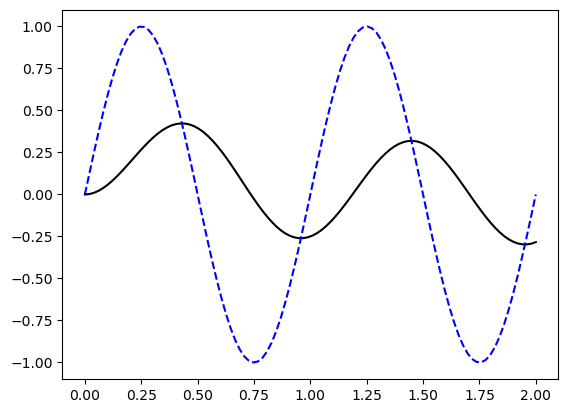

In [7]:
from matplotlib import pyplot
%matplotlib inline

pyplot.plot(t, y_out, color='k', linestyle='-') # output
pyplot.plot(t, A*numpy.sin(2*numpy.pi/T*t), color='b', linestyle='--'); # input



Gain:
\begin{align*}
G & = \frac{|V_{out}|}{|V_{in}|}\\
& = \frac{1}{\sqrt{1+ \left( \frac{\omega}{\omega_{cutoff}}\right)^2 }} = \frac{1}{\sqrt{1+ \left( \frac{f}{f_{cutoff}}\right)^2 }}
\end{align*}

Phase shift:
\begin{align*}
\phi & = \arctan \left( \frac{\text{imaginary component}}{\text{real component}} \right) \\
& = -\arctan \left( \frac{\omega}{\omega_{cutoff}} \right)
\end{align*}

<img src="img/1stLPFBodePlot.png" width="480">

Output lags the input.

### Diode
It allows current to flow only in one direction (forward biased), by impeding the current to flow in the other direction (reverse biased).  It is the electronic equivalent of a check valve.


<img src="img/PN_diode.png" width="240">

A diode is typically made of 2 types semiconductor materials: p-type and n-type.  P-type material has excess positive charges (or holes) in the outer electronic shell of neutral atoms, while n-type material has excess negative charges (or electrons).  When the two materials are put in contact, they create a p-n junction.  In thermal equilibrium and with no voltae potential applied accross the junction, electrons and holes diffuse result in the following charge distribution.


<img src="img/PN-junction-equilibrium.png" width="240">

Forward bias: When the p-type is connected to a positive terminal (cathode) and the n-type to a negative terminal (anode), there is a flow of electrons and holes across the junction.

<img src="img/diode.png" width="240">

Reverse bias: when the polarity is reversed, holes and electrons further separate from the junction creating a high resistance. 

_EXEMPLES OF CIRCUITS

__Half-Wave rectifier__

<img src="img/HalfWaveRectifier.png" width="240">

<img src="img/TimeResponseHalfWaveRectifier.png" width="240">

__LED - light emitting diode__
In a LED, the electrons recombine with the holes, releasing photons (energy).  The energy of a photon is $\epsilon = h \nu =hc/\lambda$, so the the color of the photon is inversely propotional to the energy of the electon-hole recombination and the energy necessary to cross the band gap of the semiconductor.

__PHOTODIODE__
The photodiode is the complimentary of a LED.  Here when a photon strikes a photodiode p-n junction, it creates an electron-hole pair.  Holes move toward the anode and electrons toward the cathode and a photocurrent is produced.

## Operational Amplifiers
 
<img src="img/Op-Amp_General.png" width="240">

### Open-loop operation
\begin{align*}
V_{out} = A \left( V_{in}(+) - V_{in}(-) \right)
\end{align*}
$A$: open-loop gain

_exercise_

>The open-loop gain of an op-amp is $A = 1 \times 10^6$. The high supply voltage $V^+_{supply} = 15.0\text{ V}$. The op-amp saturates at 13.9 V. Calculate the input voltage difference (Vp − Vn) that will cause saturation when the op-amp is operated in an open-loop configuration.

#### Exemple Digital to Analog Converter: ''Flash'' AD

<img src="img/ADC_Flash.png" width="240">

### Closed-loop/feedback operation
In practice, to avoid saturation, most op-amps are used in closed loop operation.  For an ideal op-amp, this forces to have $V_in(+) \sim V_in(-)$ for an ideal op-amp.  We will see more on this later.

__Real Op-Amp__
\begin{align*}
A_0 & \sim 10^6\\
f_0 & \sim 10^6 \text{ Hz}\\
R_{in} & \sim 10^6 \Omega \\
R_{out} & \sim 1 \Omega \\
\end{align*}

__Ideal Op-Amp Rules__
\begin{align*}
A & = \infty\\
R_{in} & = \infty \\
R_{out} & = 0 \\
I_{in} & =0 \\
V_{in}(+) & = V_{in}(-)
\end{align*}

Explain more implication of impedance loading based on real vs ideal op-amp behavior.  Will lead to max gain of $G=30$.

$R_{in}<<R<<R_{out}$

If Rs are too small.  Draw too much power.

### $\times 1$ Buffer

<img src="img/Buffer.png" width="240">

\begin{align*}
V_{out} & =  V_{in} \\
R_{out} & = 0 \\
R_{in} & = \infty
\end{align*}

### Inverting Amplifier

<img src="img/InvertingAmp.png" width="240">

\begin{align*}
V_{out} = - \frac{R_2}{R_1} V_{in}
\end{align*}

- Input impedance: $R_{in} = R_1$
- Output impedance: $R_{out} = 0 \, \Omega$

_exercise_

> You have access to op-amps and many $10\text{ k}\Omega$.  Show how these components can be used to double the voltage of an input signal. Use inverting circuits, and draw the circuit diagram.


### Non-Inverting Amplifier

<img src="img/Non-InvertingAmp.png" width="240">

\begin{align*}
V_{out} = & \left( 1+ \frac{R_2}{R_1} \right) V_{in}
\end{align*}

- Input impedance: $R_{in} = \infty$
- Output impedance: $R_{out} 0 \, \Omega$


> You have access to op-amps and many $10\text{ k}\Omega$.  Show how these components can be used to double the voltage of an input signal. Use non-inverting circuits, and draw the circuit diagram.

### Differencing Amplifier

<img src="img/DifferencingAmp.png" width="240">

\begin{align*}
V_{out} =  \frac{R_2}{R_1} \left( V_{in}(+) - V_{in}(-) \right) 
\end{align*}

### First-order, active, low-pass, inverting filter

<img src="img/ActiveLPFilter.png" width="240">
\begin{align*}
\frac{V_{out}}{V_{in}} = & -  \frac{R_2}{R_1} \frac{1}{1+i \omega R_2 C} \\
= & -  \frac{R_2}{R_1} \frac{1}{1+i \frac{f}{f_{cutoff}}} \\
\text{with } f_{cutoff} = \frac{1}{2\pi R_2 C} \\
\end{align*}

### Non-inverting Schmitt Trigger
We saw this circuit in the module on digital data acquisition.  It has a hysteresis by design which is accomplished with the positive feedback loop.

<img src="img/SchmittTrigger_ciruit.png" width="240">

<img src="img/SchmittTrigger.png" width="240">

<img src="img/TTL_withNoise.png" width="360">

### Real op-amps effects
#### Common Mode Rejection Ratio

#### Gain-Bandwidth Product, GBP
Internal cutoff frequency: $f_c$ or bandwidth
$G_{theoretical}$: gain of the circuit under consideration

GBP is constant: $GBP \sim 1$ MHz.
\begin{align*}
GBP & = G_{theoretical} \times f_c \\
f_c & = \frac{GBP}{G_{theoretical}}
\end{align*}

At very high frequency op-amp acts like a low pass filter.


<img src="img/GBP-741.png" width="240">

In [5]:
GBP = 1e6 # Hz
G_th = 10 # dimensionless
f_c = GBP/G_th
print('max frequency I can amplify : ', f_c, ' Hz')

max frequency I can amplify :  100000.0  Hz


Hearing: 20 -20 000 Hz
$f_{sampling} > 40000$ Hz
MP3: f_s = 44.1 kHz
take f_s = 40 kHz
amplify by 100: can I use a single Op-amp circuit? ie single inverting amplifier stage if GBP = 1 MHz?

In [6]:
G_th = 100
GBP = 1e6
f_c = GBP/G_th
print(f_c , ' Hz')

10000.0  Hz


Solution:
Use 2 inverting op-amp circuit in series of gain G = 10
f_c of each stage is 100 kHz > 40 kHz!!!
I can amplify my sound!

In practice: $G_{max}$ < 30: because of GBP, and also this would force resistances ($R_1$ and $R_2$) to be either too low or too high.

_exercise_

>One wishes to measure a pressure pulse with a very sensitive pressure transducer.  Unfortunately, the voltage output of the pressure transducer is on the order of $\pm 5$ mV and the smallest range of our Data Acquisition board is $\pm 100$ mV.  

>>To utilize the most of our DAQ board dynamic range, and hence increase our resolution, you wish to use an amplifier.  What would be the gain you would select?  

>Because experiments are never easy, we have high-power electrical components just next to the DAQ system, which create a lot of electromagnetic noise.

>>Will you choose an inverting or a non-inverting amplifier in this experiment?  Explain why?  (hint: here you probably want to maximize your signal to noise ratio, SNR).


> One wishes to measure a impulse loading created by a detonation (i.e. a fast transient) with a pressure transducer.  The signal needs to be amplified by a factor of 100 to measure this phenomena of frequency 20,000 Hz.  The gain product bandwidth $GBP = 1$ MHz, of the 741 op-amps we have available in the lab.  

>>What kind of circuit will you use, i.e. how many amplifiers? Explain why?

>> Will you use inverting or non-inverting amplifiers? Justify why?



> A signal contains a frequency component at 100 Hz with amplitude 3.50 V, but there is also some undesired
noise in the signal at 15,200 Hz, amplitude 0.20 V. The DC offset is negligible. You are not aware of the
noise, so you sample the signal at a sampling frequency of 512 Hz and collect 4,096 data points with an 16-bit DAQ system with a range of $\pm 5$ V.

>What is the frequency resolution of this signal?

$\Delta t = 1/f_s$

$\Delta f = 1/T_s$

$T_s$ sampling period: $T_s = N \Delta t = N/f_s$

$\Delta f = f_s/N$

In [3]:
deltaf = 512/4096
print(deltaf, ' Hz')

0.125  Hz


> What is the folding frequency of the resulting frequency spectrum?

$f_{folding} = f_s/2$

$f_{folding} = 256$ Hz

> You wish to add an anti-aliasing filter to the digital data acquisition system. The anti-aliasing filter is based on a first order low-pass filter.  Select the cutoff frequency of the filter, justify why.

In [6]:
print(15200/512)
print(30*512-15200)



29.6875
160


> Estimate the amplitude of the filtered noise, as well as phase and amplitude of the original signal

In [19]:
import numpy
f_carrier = 100.
f_noise = 15200.
f_c = 256.
G_noise = 1/numpy.sqrt(1+(f_noise/f_c)**2)
A_noise = 1.6

A_noiseFiltered = G_noise*A_noise
print(A_noiseFiltered,'V')

phi_carrier = - numpy.arctan(f_carrier/f_c) *180/numpy.pi
print(phi_carrier,'deg')

0.026943547335704327 V
-21.336859291805656 deg


> How does this amplitude compare to the DAQ quantization error? 

In [13]:
Q=(5-(-5))/2**17

print(Q,'V')

7.62939453125e-05 V


> Ideally, one wishes to make the noise on the same order than the quantization error. What would be the order of the filter necessary to do so?

In [21]:
f_carrier = 100.
f_noise = 15200.
f_c = 256.
G_noise = 1/numpy.sqrt(1+(f_noise/f_c)**(2*3))
A_noise = 0.2*8

A_noiseFiltered = G_noise*A_noise
print(A_noiseFiltered,'V')

7.643796471701661e-06 V


In [7]:
Q = 20/2**17
print('Q = ', Q)

A_noise = 0.2 #V

G_filter = Q/A_noise

print('G_filter = ', G_filter)

f_carrier = 20.
f_noise = 10000.
f_c = 100.
G_noise = 1/numpy.sqrt(1+(f_noise/f_c)**4)
G_carrier = 1/numpy.sqrt(1+(f_carrier/f_c)**2)
phi_carrier = - numpy.arctan(f_carrier/f_c) *180/numpy.pi

print('Gain noise', G_noise, G_noise/G_filter)
print('Gain carrier', G_carrier)
print( 'phase carrier', phi_carrier, ' deg')

Q =  0.000152587890625
G_filter =  0.000762939453125
Gain noise 9.99999995e-05 0.13107199934463998
Gain carrier 0.9805806756909201
phase carrier -11.309932474020213  deg


>>What is the frequency resolution of this signal?

>> What is the folding frequency of the resulting frequency spectrum?

>> You wish to add an anti-aliasing filter to the digital data acquisition system. The anti-aliasing filter is based on a first order low-pass filter.  Select the cutoff frequency of the filter, justify why.

>> Estimate the amplitude of the filtered noise, as well as phase and amplitude of the original signal

>> How does this amplitude compare to the DAQ quantization error? 

>> Ideally, one wishes to make the noise on the same order than the quantization error. What would be the order of the filter necessary to do so?



<img src="img/Op-Amp_Feedback.png" width="240">

\begin{align*}
V_{out} & = A(\omega) \left( V_{in} - f V_{out} \right)\\
\frac{V_{out}}{V_{in}} & = \frac{A(\omega)}{1+f A(\omega)}\\
\text{typically}\\
A(\omega) & = \frac{A_0}{1+i\frac{\omega}{\omega_0}}
\end{align*}
